### Frontmatter

In [1]:
import numpy as np
import sys
#from scipy.stats import linregress
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import statsmodels.api as sm
from collections import OrderedDict

/Users/chrishedemann/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import data

In [2]:
### CMIP5 Data
for run in range(101,201):
    file = '../Data/tsurf-grandens/tsurf_gm_yy_1850_2015_lkm0{}.nc'.format(run)
    tmp = Dataset(file,mode='r').variables['tsurf'][:,0,0]
    try:
        T_ens   = np.concatenate((T_ens,tmp[...,np.newaxis]),axis=-1)
    except:
        T_ens   = tmp[...,np.newaxis] 

year_ens = np.trunc(Dataset(file,mode='r').variables['time'][:] / (24*365) + 1850)

### HadCrut4 Data
f = open('../Data/hadcrut4.txt', 'r')
year  = np.array([])
T  = np.array([])
lower = np.array([])
upper = np.array([])
for line in f:
    line = line.strip()
    columns = line.split()
    year  = np.append(year ,int(columns[0])    )
    T     = np.append(T ,float(columns[1])  )
    lower = np.append(lower,float(columns[-2]) )
    upper = np.append(upper,float(columns[-1]) )
    
f.close()

#print(year)
print(T_ens.shape)

(166, 100)


### Cut to size

In [3]:
# # year = year[50:]
# # gmst = gmst[50:]
# # lower= lower[50:]
# # upper= upper[50:]

# # year_model = np.arange(1900,2013)

# ##Take anomaly from 1961-1990
# T_mean = np.mean(T[61:91])

T_ens  -= np.mean(T_ens[1850-1850:1880-1850,:])
T      -= np.mean(T[1850-1850:1880-1850])
# gmst   -= gmst_mean
# lower  -= gmst_mean
# upper  -= gmst_mean

### Take trends

In [4]:
# years_h = year[98:113]
# gmst_h  = gmst[98:113]
# years_l = year[51:113]
# gmst_l  = gmst[51:113]
# years_m = year_model[98:113]
# gmst_m  = cmip5[98:113]

In [5]:
# trd_h, y_h, *dummy = linregress( years_h, gmst_h )
# trd_l, y_l, *dummy = linregress( years_l, gmst_l )
# trd_m, y_m, *dummy = linregress( years_m, gmst_m )
# ##         #calculate linregress (slope, intercept, r-value, p-value, stderr), store slope

### Plot results

In [6]:
# fig = plt.figure()
# ax  = fig.add_subplot(111)

almost_black     = '#262626'
dred             = '#B44128'

#Colours hiatus, long-term, and model during hiatus
col_h = '#289BB4'
col_l = '#0C48C5' #'#94CDDA'
col_m = '#CD6D0C' #'#E5A41A'

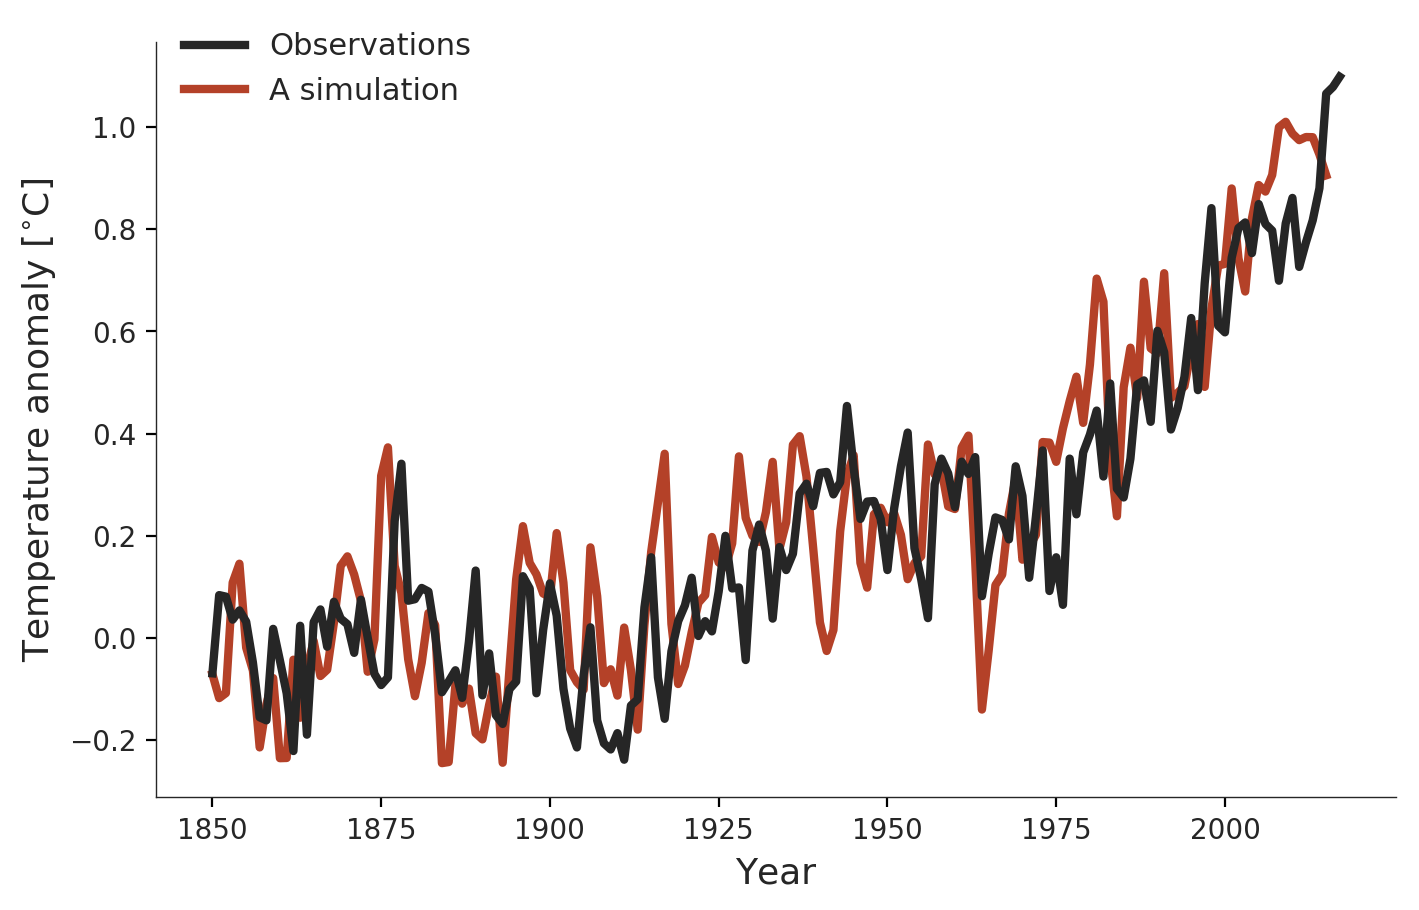

In [7]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
### ACTUAL HEAT CONTENT IN RED
hdls = ax.plot(year, T, '-',color=almost_black,alpha=1.0,lw=3,zorder=2,label="Observations")


# hdls += ax.plot(year, lower, '-',color=almost_black,alpha=1.0,lw=1)
# ax.plot(year, upper, '-',color=almost_black,alpha=1.0,lw=1)

####
hdls += ax.plot(year_ens, T_ens[:,2], '-',color=dred,alpha=1.0,lw=3,zorder=1,label="A simulation")


#hdls += ax.plot(year_ens, T_ens, '-',color=col_h,alpha=1.0,lw=3,zorder=0,label="Large Ensemble")
#hdls += ax.plot(years_l, trd_l*years_l + y_l, '-',color=col_l,alpha=1.0,lw=3)


ax.set_ylabel('Temperature anomaly [$^{\circ}$C]',fontsize=13)
ax.set_xlabel('Year',fontsize=13)
ax.set_xticks((1850,1875,1900,1925,1950,1975,2000))

spines_to_remove        = ['top', 'right'] 
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    

# ax2.spines['top'].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

spines_to_keep = [ 'bottom', 'left']     
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)


    # plt.tight_layout()
    # plt.savefig('State_dependence_framework.eps', format='eps')
    # plt.close()
#hdls[0].set_markerfacecolor('black')

handles, labels = ax.get_legend_handles_labels()

by_label = OrderedDict(zip(labels, handles))

leg = ax.legend(by_label.values(), by_label.keys(),frameon=False,
                 fontsize=11, loc='upper left',  bbox_to_anchor=(0., 1.05),)
# leg.get_frame().set_facecolor('white')
# leg.get_frame().set_edgecolor('white')

# Change the legend label colors to almost black, too
texts = leg.texts
for t in texts:
    t.set_color(almost_black)

[i.set_color(almost_black) for i in ax.get_xticklabels() + ax.get_yticklabels() + [ax.xaxis.label,] + [ax.yaxis.label,]]

# ax2.spines['right'].set_position(('outward', 15))
# ax2.spines['right'].set_smart_bounds(True)
    
#plt.tight_layout()
plt.savefig('../plots/Variability01.pdf',bbox_inchdes='tight',transparent=True)
plt.show()
#plt.pause(0.01)

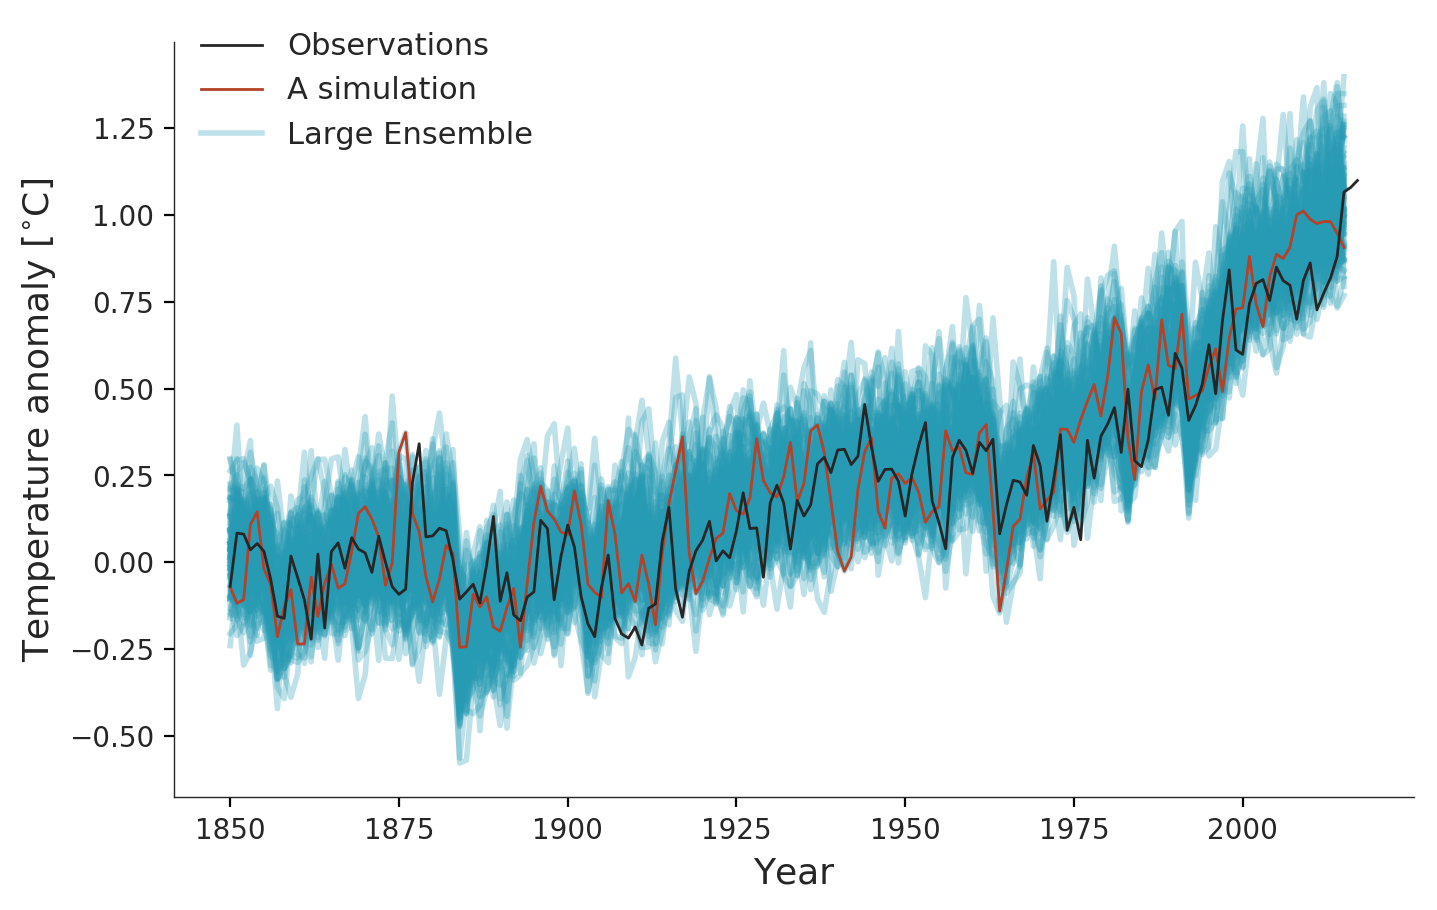

In [8]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
### ACTUAL HEAT CONTENT IN RED
hdls = ax.plot(year, T, '-',color=almost_black,alpha=1.0,lw=1,zorder=2,label="Observations")


# hdls += ax.plot(year, lower, '-',color=almost_black,alpha=1.0,lw=1)
# ax.plot(year, upper, '-',color=almost_black,alpha=1.0,lw=1)

####
#hdls += ax.plot(year_ens, T_ens[:,4], '-',color=col_m,alpha=1.0,lw=3,zorder=1,label="Einzige Simulation")
hdls += ax.plot(year_ens, T_ens[:,2], '-',color=dred,alpha=1.0,lw=1,zorder=1,label="A simulation")
hdls += ax.plot(year_ens, T_ens, '-',color=col_h,alpha=0.3,lw=2,zorder=0,label="Large Ensemble")
#hdls += ax.plot(years_l, trd_l*years_l + y_l, '-',color=col_l,alpha=1.0,lw=3)


ax.set_ylabel('Temperature anomaly [$^{\circ}$C]',fontsize=13)
ax.set_xlabel('Year',fontsize=13)
ax.set_xticks((1850,1875,1900,1925,1950,1975,2000))

spines_to_remove        = ['top', 'right'] 
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    

# ax2.spines['top'].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

spines_to_keep = [ 'bottom', 'left']     
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)


    # plt.tight_layout()
    # plt.savefig('State_dependence_framework.eps', format='eps')
    # plt.close()
#hdls[0].set_markerfacecolor('black')

handles, labels = ax.get_legend_handles_labels()

by_label = OrderedDict(zip(labels, handles))

leg = ax.legend(by_label.values(), by_label.keys(),frameon=False,
                 fontsize=11, loc='upper left',  bbox_to_anchor=(0., 1.05),)
# leg.get_frame().set_facecolor('white')
# leg.get_frame().set_edgecolor('white')

# Change the legend label colors to almost black, too
texts = leg.texts
for t in texts:
    t.set_color(almost_black)

[i.set_color(almost_black) for i in ax.get_xticklabels() + ax.get_yticklabels() + [ax.xaxis.label,] + [ax.yaxis.label,]]

# ax2.spines['right'].set_position(('outward', 15))
# ax2.spines['right'].set_smart_bounds(True)
    
#plt.tight_layout()
plt.savefig('../plots/Variability02.pdf',bbox_inchdes='tight',transparent=True)
plt.show()
#plt.pause(0.01)

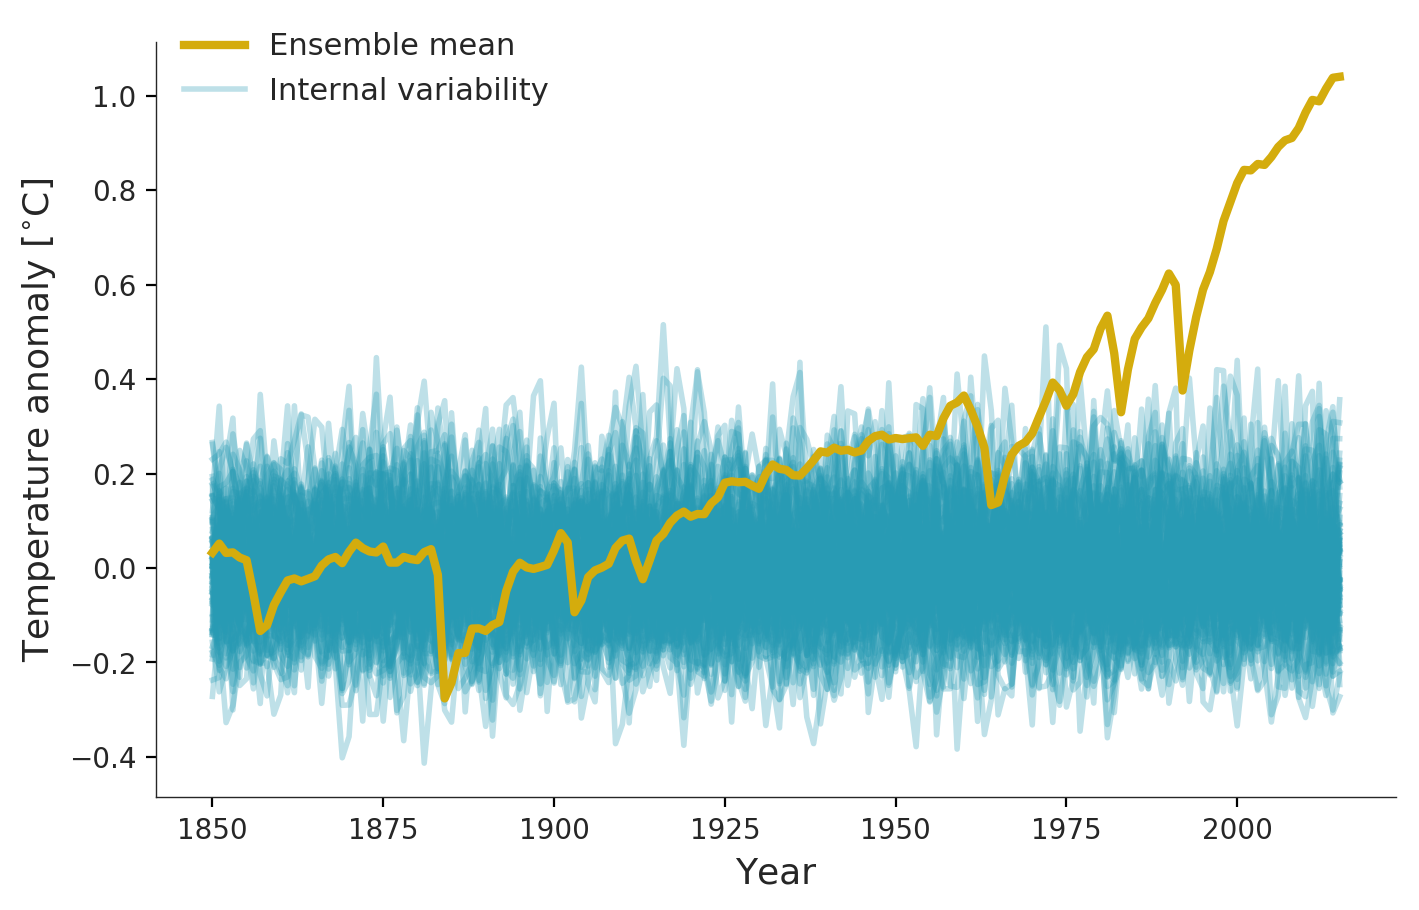

In [15]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
### ACTUAL HEAT CONTENT IN RED
ensmean = np.mean(T_ens,axis=1,keepdims=True)

col_mn='#D4AC0D'
####

hdls += ax.plot(year_ens, np.squeeze(ensmean), '-',color=col_mn,alpha=1.0,lw=3,zorder=1,label="Ensemble mean")
hdls += ax.plot(year_ens, T_ens - ensmean, '-',color=col_h,alpha=0.3,lw=2,zorder=0,label="Internal variability")
#hdls += ax.plot(years_l, trd_l*years_l + y_l, '-',color=col_l,alpha=1.0,lw=3)


ax.set_ylabel('Temperature anomaly [$^{\circ}$C]',fontsize=13)
ax.set_xlabel('Year',fontsize=13)
ax.set_xticks((1850,1875,1900,1925,1950,1975,2000))

spines_to_remove        = ['top', 'right'] 
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
    

# ax2.spines['top'].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

spines_to_keep = [ 'bottom', 'left']     
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)


    # plt.tight_layout()
    # plt.savefig('State_dependence_framework.eps', format='eps')
    # plt.close()
#hdls[0].set_markerfacecolor('black')

handles, labels = ax.get_legend_handles_labels()

by_label = OrderedDict(zip(labels, handles))

leg = ax.legend(by_label.values(), by_label.keys(),frameon=False,
                 fontsize=11, loc='upper left',  bbox_to_anchor=(0., 1.05),)
# leg.get_frame().set_facecolor('white')
# leg.get_frame().set_edgecolor('white')

# Change the legend label colors to almost black, too
texts = leg.texts
for t in texts:
    t.set_color(almost_black)

[i.set_color(almost_black) for i in ax.get_xticklabels() + ax.get_yticklabels() + [ax.xaxis.label,] + [ax.yaxis.label,]]

# ax2.spines['right'].set_position(('outward', 15))
# ax2.spines['right'].set_smart_bounds(True)
    
#plt.tight_layout()
plt.savefig('../plots/Variability03.pdf',bbox_inchdes='tight',transparent=True)
plt.show()
#plt.pause(0.01)

In [10]:
plt.close

<function matplotlib.pyplot.close>

### Caculate variability

In [11]:
print(np.std(T))
print(np.std(T_ens))
T_ens_mn = np.mean(T_ens,axis=-1,keepdims=True)
T_ens_anm = T_ens - T_ens_mn
print(np.std(T_ens_anm))
print(np.std(T_ens_mn))

Xx = sm.add_constant(year)
model = sm.OLS(T, Xx).fit() 
Tt = model.predict(sm.add_constant(Xx)) 
#model.summary()
T_anm = T-Tt
print(np.std(T_anm))
print(np.std(Tt))

0.29829537196
0.322046
0.117669
0.29978
0.167147587486
0.247066414008


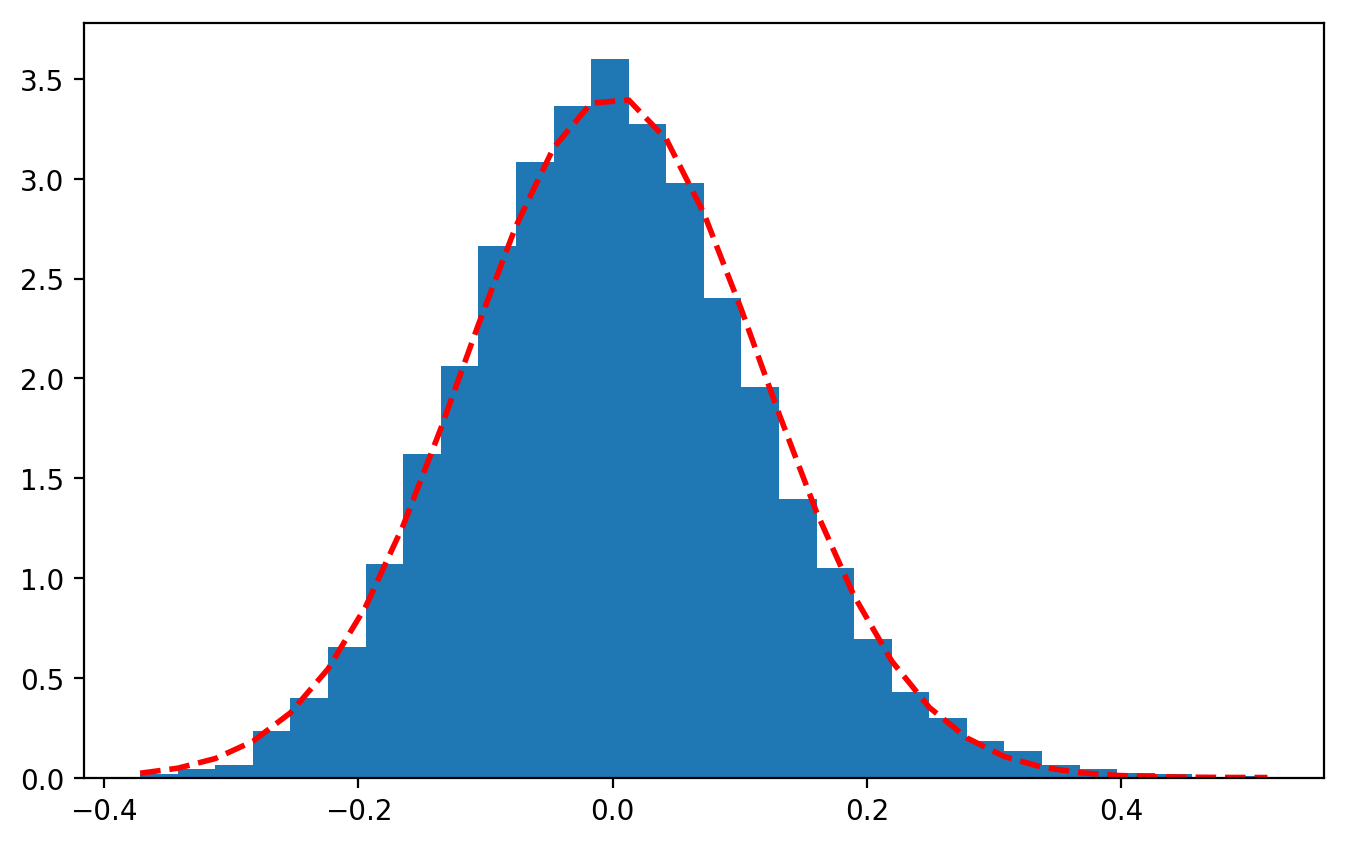

In [12]:
from scipy.stats import norm
import matplotlib.mlab as mlab

xx = T_ens_anm[::2,:].flatten()

fig, ax = plt.subplots(figsize=(8,5),dpi=200) 
n, bins, patches = plt.hist(xx,bins=30,density=True)

yy = norm.pdf(bins, np.mean(xx), np.std(xx))
line = plt.plot(bins,yy, 'r--', linewidth=2)

plt.show()

0.9999931663648478
-6.83365850158e-06


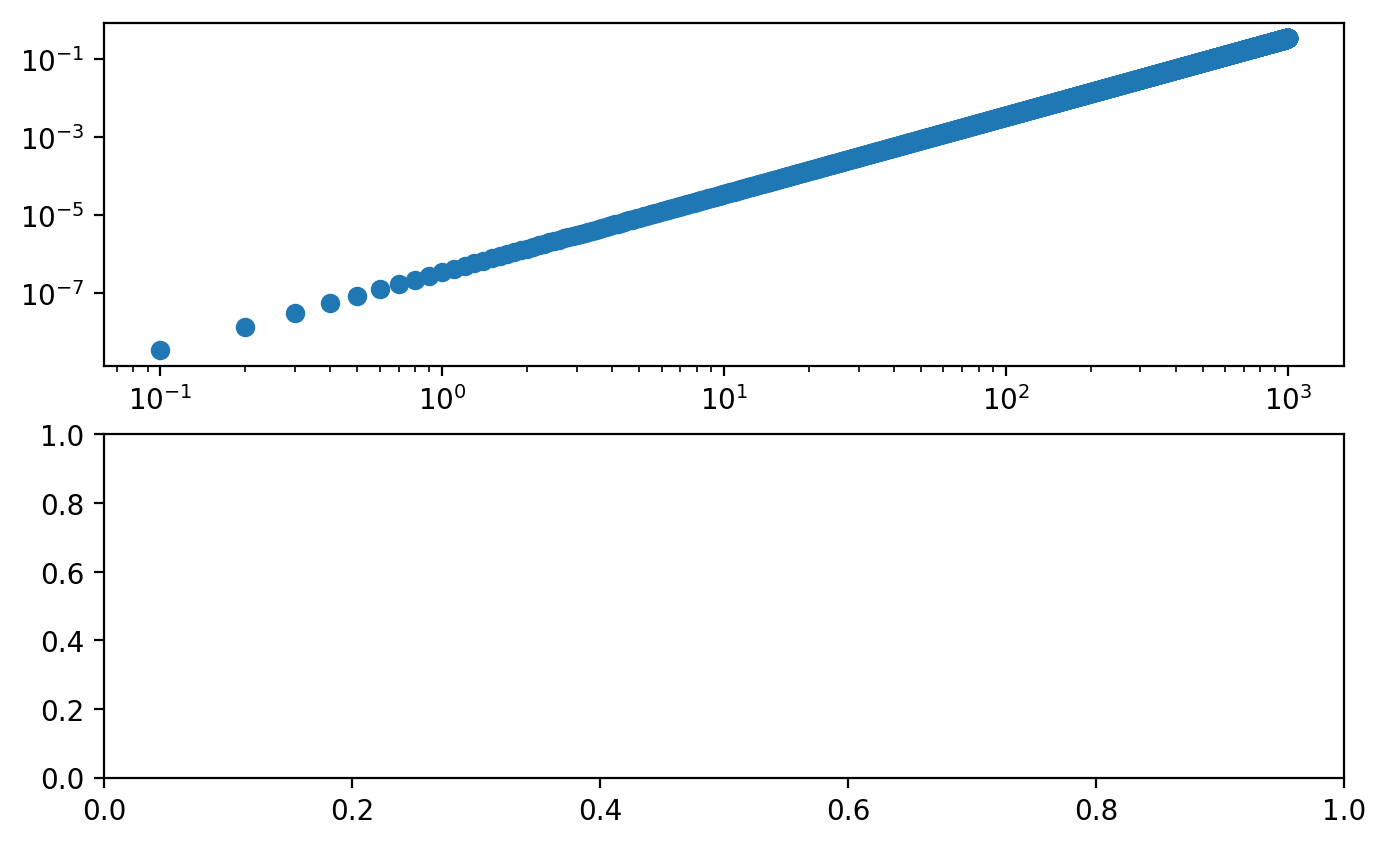

In [68]:
fig, ax = plt.subplots(2, figsize=(8,5),dpi=200)

lam = -1.5
C = 0.7 * 75 * 4181
r = 1 + lam/C
print(r)
a = (np.log(1+lam/C))
print(a)

period = np.arange(0.1,1000.,0.1)
freq = 2 * np.pi / period
F_auto = 2 * abs(a) / (a**2 + freq**2)

ax[0].loglog(years,F_auto,'o')

plt.show()